<a href="https://colab.research.google.com/github/sai-teja-ponugoti/Machine-Learning-Concepts/blob/master/data_agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Agumentation Programming**

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.This technique is very useful when the training set data is small.

There are already many good articles published on this concept.o learn about when to use data agumentation [click here](https://medium.com/nanonets/nanonets-how-to-use-deep-learning-when-you-have-limited-data-f68c0b512cab) and for learning about concepts of Data agumentation you can refer them at [Data Augmentation ](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced) . 

In this articel I'm going to solely concetrate on the coding part of Data Agumenation.

At first we look how this can be done using numpy and then we disscuss about the agumentation class in keras thats brings simplicity for this task.

## **Using Numpy**

In [0]:
import numpy as np
import scipy
import seaborn as sns
from scipy.ndimage import rotate
import pandas.util.testing as tm
import matplotlib.pyplot as plt


sns.set(color_codes=True)

In [165]:
# reading image - modify with the path accordingly
image = np.array(plt.imread('thanos.jpg'))
# copying the image to a temporary image
img = image.copy()
print(img.shape)
# stroing sriginal width and height to use for cropping
original_width,original_height,_ = image.shape


(563, 1000, 3)


### **Image Cropping**

In [0]:
def image_cropping(img, crop_size=(int(original_width*0.8), int(original_height*0.8))):
    assert crop_size[0] <= img.shape[0], "Crop width size should be less than image width size"
    assert crop_size[1] <= img.shape[1], "Crop height size should be less than image height size"
    w, h = img.shape[:2]
    x, y = np.random.randint(w-crop_size[0]), np.random.randint(h-crop_size[1]) 
    # print(x,y)
    img = img[y:y+crop_size[0], x:x+crop_size[1]]
    # print(img.shape)
    return img

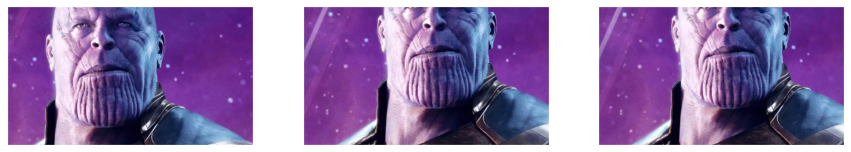

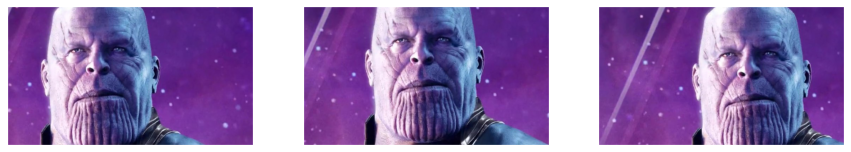

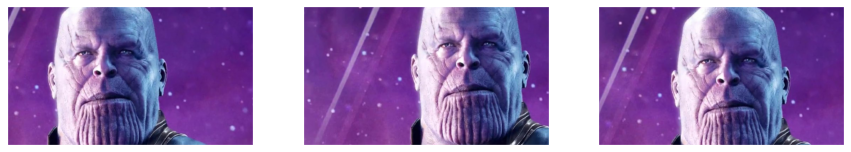

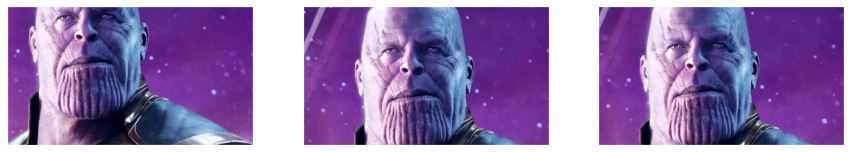

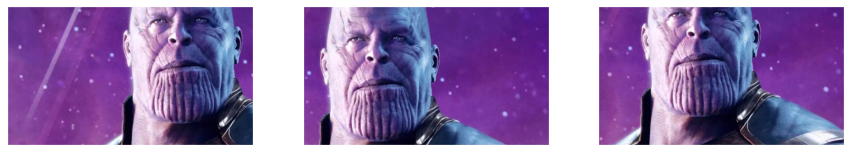

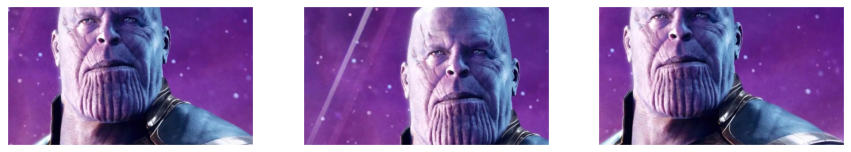

In [170]:
# difine the number of crop ratios that we want to try
# not prefered below 70% as we might loose valuble information in the image
crop_ratio = [0.7,0.8,0.9]
# number for iteration for each crop size
num_of_iterations = 2
# lets define a loop so that we can try out multiple crop ratios and multipel iterations for random croppings
for cr in crop_ratio:
    # print("cropping window = {0}%",format(cr))
    for i in range(num_of_iterations):
        plot_grid([random_cropping(img, crop_size=(crop_width , crop_height)),
                   random_cropping(img, crop_size=(crop_width , crop_height)),
                   random_cropping(img, crop_size=(crop_width , crop_height))],
           1, 3, figsize=(15, 10))
        # use below code to save the images instead of displaying them.
        # matplotlib.image.imsave('thanos_' + str(cr) + '_' +str(i) + '.png', random_cropping(img, crop_size=(int(original_width*cr) , int(original_height*cr))))

# **Rotating Images**

In [0]:
def image_rotation(img, angle, bg_patch=(5,5)):
    assert len(img.shape) <= 3, "image shape dimensions are incorrect"
    rgb = len(img.shape) == 3
    if not rgb:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1]])
    else:
        bg_color = np.mean(img[:bg_patch[0], :bg_patch[1], :], axis=(0,1))
    img = rotate(img, angle, reshape=False)
    mask = [img <= 0, np.any(img <= 0, axis=-1)][rgb]
    img[mask] = bg_color
    return img

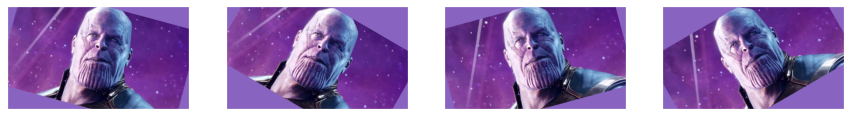

In [177]:
# specify the angle required to rotate the image
# for random selection of angle use np.rand 
plot_grid([rotate_img(img, angle=-15),
           rotate_img(img, angle=-30), 
           rotate_img(img, angle=15),
           rotate_img(img, angle=30),],
           1, 4, figsize=(15, 10))

### **Image Shifting or otherwise called Image translation**

In [0]:
def show_img(img, ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)

    
def plot_grid(imgs, nrows, ncols, figsize=(10, 10)):
    assert len(imgs) == nrows*ncols, f"Number of images should be {nrows}x{ncols}"
    _, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        show_img(img, ax)

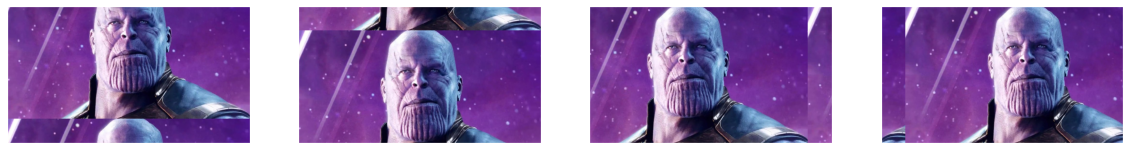

In [179]:
def image_shifting(img, shift=100, direction='right', roll=True):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
    img = img.copy()
    if direction == 'right':
        right_slice = img[:, -shift:].copy()
        img[:, shift:] = img[:, :-shift]
        if roll:
            img[:,:shift] = np.fliplr(right_slice)
    if direction == 'left':
        left_slice = img[:, :shift].copy()
        img[:, :-shift] = img[:, shift:]
        if roll:
            img[:, -shift:] = left_slice
    if direction == 'down':
        down_slice = img[-shift:, :].copy()
        img[shift:, :] = img[:-shift,:]
        if roll:
            img[:shift, :] = down_slice
    if direction == 'up':
        upper_slice = img[:shift, :].copy()
        img[:-shift, :] = img[shift:, :]
        if roll:
            img[-shift:,:] = upper_slice
    return img


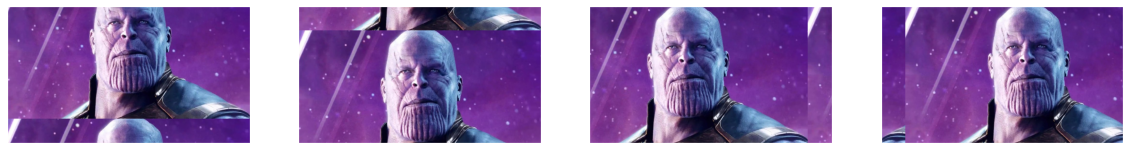

In [180]:
# give the number of pixels that you want your image to get shift
plot_grid([translate(img, direction='up', shift=100),
           translate(img, direction='down', shift=100), 
           translate(img, direction='left', shift=100),
           translate(img, direction='right', shift=100)],
           1, 4, figsize=(20, 10))

# **Using Tensor flow and Keras**

Tensorflow has a separate class which deals with data agumentation with a lot of different options rather than just flipping, zooming and croping the images.

By using Keras, there is need for manual adujstment of pixels as shown above.Keras will automatically take care of these things.So the code required for agumentaion with keras is way less along with multiple options.

Lets look at keras's image preproseesing ImageDataGenerator class:

```
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
```
Lets look at some of teh arguments that we can use for data agumentation.

**Arguments**

*   zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
*   zca_whitening: Boolean. Apply ZCA whitening.
*   **rotation_range:** Int. Degree range for random rotations.
*   **width_shift_range:** Float, 1-D array-like or int - fraction of total width
*   **height_shift_range:** Float, 1-D array-like or int - fraction of total height
*   **brightness_range:** Tuple or list of two floats. Range for picking a brightness shift value from.
*   **shear_range:** Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
*   **zoom_range:** Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]. Fraction of total image to be zoomed.
*   **horizontal_flip:** Boolean. Randomly flip inputs horizontally.
*   **vertical_flip:** Boolean. Randomly flip inputs vertically.
*   **rescale:** rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
*   **preprocessing_function:** function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
*   **data_format:** Image data format, either "channels_first" or "channels_last". 
*   validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).
*   dtype: Dtype to use for the generated arrays.

For more details and arguments please check out [tf documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

Lets agument our images with some of the most common techniques like flipping,rotation,width and height shiftting, varing brighteness of the image,zooming and rescaling the images.




In [0]:
from keras.preprocessing.image import *

# lets define a ImageDataGenerator object
# change the arguments below as per the requirment
idg = ImageDataGenerator(rescale = 1/255,
                                     horizontal_flip = True,
                                     rotation_range = 30,
                                     width_shift_range = 0.3,
                                     height_shift_range = 0.3,
                                     brightness_range=[0.2,1.0],
                                     zoom_range=[0.5,1.0]
                         )

In [0]:
# sample code to check if our agumentation is working for a single image
# lets read our image to be processed - change the directory as needed
image = load_img("thanos.jpg")
input_arr = img_to_array(image)
# reshaping the image to a 4D array to be used with keras flow function.
input_arr = input_arr.reshape((1,) + input_arr.shape) 

i = 0
# keras flow function usually work for batches
# chnage the directory and number of iterations as required
for batch in idg.flow(input_arr, batch_size=1,
                          save_to_dir='/content/cat', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 5:
        break  # need to break the loop otherwise it will run infinite times


Now lets look at a complete example of agumenting a complete dataset.We will consider the cifar10 dataset.


In [0]:
from keras.datasets import cifar10
import numpy as np 
from keras.utils.np_utils import to_categorical

# loading the data into train ans test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

num_classes = 10
#converting the output labels to one hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# creating data aguementaion object with required arguments
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.2,1.0],
    zoom_range=[0.5,1.0],
    featurewise_center=True,
    featurewise_std_normalization=True,
    )

# fitting training data to out datagen object
data_gen.fit(x_train)

#build your model here and assume its name is "model"
# model = .........

# fits the model on batches with real-time data augmentation:
# fitting the model with agumented train data
model.fit(data_gen.flow(x_train, y_train, batch_size=32),
          steps_per_epoch=len(x_train) / 32, epochs=epochs)